# Review 1: list, tuple, dict

In [16]:
list_a = [1, 2, 3, 4, 5]
list_a


[1, 2, 3, 4, 5]

In [1]:
x = list()
x

[]

In [17]:
tuple_a = (1, 2, 3, 4, 5)
tuple_a

(1, 2, 3, 4, 5)

In [19]:
dict_a = {
    'name':['tom', 'jerry'],
    'age':[7, 9, 8]
    }
dict_a

{'name': ['tom', 'jerry'], 'age': [7, 9, 8]}

# Review 2: if else

In [20]:
x = 5
if (x == 5):
    print('Yes')
else:
    print('No')

Yes


# Review 3: try except

In [5]:
tuple_a = (1, 2)
try:
    tuple_a[0] = 0.5
except:
    print('Tuple cannot be changed!')

Tuple cannot be changed!


# Review 4: for

In [24]:
for i in range(5):
    print(i)
print('\n')

list_a = [5, 7, 8, 9]
for item in list_a:
    print(item)
print('\n')

for idx, item in enumerate(list_a):
    print(idx, item)

0
1
2
3
4


5
7
8
9


0 5
1 7
2 8
3 9


In [8]:
for i in range(5):
    if i == 1:
        continue#break
    else:
        print(i)

0
2
3
4


# Review 5: bubble sorting

In [12]:
def bubble_sorting(unsrt_list):
    length = len(unsrt_list)
    for i in range(length):
        for j in range(length - i - 1):
            if (unsrt_list[j] > unsrt_list[j + 1]):
                temp = unsrt_list[j]
                unsrt_list[j] = unsrt_list[j + 1]
                unsrt_list[j + 1] = temp
    
    return unsrt_list

In [13]:
list_a = [5, 1, 4, 7, 1, 2]
bubble_sorting(list_a)

[1, 1, 2, 4, 5, 7]

In [9]:
list_a = [5,1,4,7,1,2]
sorted(list_a)

[1, 1, 2, 4, 5, 7]

# Review 6: class

In [6]:
class Calculator:
    def __init__(self, constant):
        self.pi = 3.1415926
        self.constant = constant
    
    def add(self, x, y):
        return x + y
    
    def compute_perimeter(self, radius):
        return 2 * self.pi * radius

tool1 = Calculator(constant=1.0)
tool2 = Calculator(constant=2.0)
tool1.compute_perimeter(radius=0.5)

3.1415926

# |-----------------------------------------***-----------------------------------------|

# 1. Linear Model

In [8]:
# load iris dataset
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston_dataset = load_boston()
train_x, eval_x, train_y, eval_y = train_test_split(boston_dataset.data, boston_dataset.target)
print(train_x.dtype, train_y.dtype)

float64 float64


D:\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
boston_dataset.data.shape

(506, 13)

In [14]:
import tensorflow as tf
import numpy as np

# 构造训练数据
# train_x = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.799],[6.182],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[5.654],[9.27],[3.1]])
# train_y = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[2.42],[2.94],[1.3]])

# create dataset
train_x = tf.convert_to_tensor(train_x)
train_y = tf.convert_to_tensor(train_y)
learning_rate = 0.001
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
dataset = dataset.batch(batch_size)

In [18]:
weights = tf.Variable(tf.random.normal([1, 1], dtype=tf.float64), name='w')
bias = tf.Variable(tf.random.normal([1, ], dtype=tf.float64), name='b')
total_epoch = 20

for epoch in range(total_epoch):
    epoch_loss = 0.
    for batch_data in dataset.as_numpy_iterator():
        batch_x, batch_y = batch_data

        with tf.GradientTape(persistent=True) as tape:
            tape.watch([weights, bias])
            pred_y = tf.matmul(batch_x, weights) + bias
            mse_loss = tf.reduce_sum(tf.pow(pred_y - batch_y, 2)) / 2 / batch_size

        dy_dw = tape.gradient(mse_loss, weights)
        dy_db = tape.gradient(mse_loss, bias)

        weights.assign_sub(learning_rate * dy_dw)
        bias.assign_sub(learning_rate * dy_db)

        epoch_loss += mse_loss.numpy()
        
    print('INFO: Epoch={}, MSE loss={:.4f}'.format(epoch, epoch_loss))

INFO: Epoch=0, MSE loss=5.6981
INFO: Epoch=1, MSE loss=5.4316
INFO: Epoch=2, MSE loss=5.1777
INFO: Epoch=3, MSE loss=4.9358
INFO: Epoch=4, MSE loss=4.7055
INFO: Epoch=5, MSE loss=4.4860
INFO: Epoch=6, MSE loss=4.2770
INFO: Epoch=7, MSE loss=4.0779
INFO: Epoch=8, MSE loss=3.8882
INFO: Epoch=9, MSE loss=3.7075
INFO: Epoch=10, MSE loss=3.5354
INFO: Epoch=11, MSE loss=3.3714
INFO: Epoch=12, MSE loss=3.2153
INFO: Epoch=13, MSE loss=3.0665
INFO: Epoch=14, MSE loss=2.9248
INFO: Epoch=15, MSE loss=2.7898
INFO: Epoch=16, MSE loss=2.6612
INFO: Epoch=17, MSE loss=2.5387
INFO: Epoch=18, MSE loss=2.4220
INFO: Epoch=19, MSE loss=2.3109


In [22]:
# linear model: an tensorflow implementation
import tensorflow as tf

def linear_model(feature_num):
    input_tensor = tf.keras.Input(shape=[feature_num, ])
    output_tensor = tf.keras.layers.Dense(1)(input_tensor)
    model = tf.keras.Model(input_tensor, output_tensor)

    return model

model = linear_model(feature_num=boston_dataset.data.shape[1])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
    metrics=['MAE']
)
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(eval_x, eval_y))

Epoch 1/10
12/12 [==============================] - 0s 8ms/step - loss: 49684.6875 - MAE: 202.2200 - val_loss: 50776.8828 - val_MAE: 201.5173
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 45160.8086 - MAE: 191.3876 - val_loss: 46214.9102 - val_MAE: 190.8056
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 40848.4531 - MAE: 180.7413 - val_loss: 42036.2148 - val_MAE: 180.4500
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 36917.0859 - MAE: 170.4046 - val_loss: 38154.1289 - val_MAE: 170.3011
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 33254.6055 - MAE: 160.3124 - val_loss: 34600.1367 - val_MAE: 160.4830
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 29968.1582 - MAE: 150.5037 - val_loss: 31304.4707 - val_MAE: 150.9167
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 26911.1680 - MAE: 141.0251 - val_loss: 28327.3301 - val_MAE: 141.7995
Epoch 

In [35]:
# linear model: an scikit-learn implementation
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)
print(model.predict(eval_x))
print('Model score:', model.score(eval_x, eval_y))

[ 1.68017204  1.57470373  2.17096404  1.20403006  0.02224573  1.60109949
  1.3990742  -0.01253199 -0.02941927  1.74685629 -0.08888909  2.13613789
  0.89473499  1.29727909  1.12751256  0.0445355   0.85295912  1.66714213
 -0.02451498 -0.08293787  1.49690672  0.00416345  1.80084773  1.26537257
  2.01553836  1.4183638   1.32378313  1.73987444  1.80056671  1.99496925
  1.3440398  -0.06524392  1.20662888  1.58252368 -0.02115791 -0.01101619
  2.10219827  1.20826132]
Model score: 0.9127490590950986


# 2. Decision Tree

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
train_x, eval_x, train_y, eval_y = train_test_split(iris_dataset.data, iris_dataset.target)

In [31]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_x, train_y)
print('Prediction\n', model.predict(eval_x))
print('Label\n', eval_y)
print('Model score:', model.score(eval_x, eval_y))

Prediction
 [2 1 2 1 0 2 1 0 0 2 0 2 1 1 1 0 1 2 0 0 2 0 2 1 2 1 1 2 2 2 1 0 1 2 0 0 2
 1]
Label
 [2 2 2 1 0 2 1 0 0 2 0 2 1 1 1 0 1 2 0 0 1 0 2 1 2 1 1 2 2 2 1 0 1 2 0 0 2
 1]
Model score: 0.9473684210526315


# 3. $k$-means clustering

In [42]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(train_x, train_y)
print('Prediction\n', model.predict(eval_x))
print('Label\n', eval_y)
print('Model score:', model.score(eval_x, eval_y))

Prediction
 [2 0 0 2 1 2 2 1 1 0 1 0 2 2 2 1 2 2 1 1 0 1 0 2 0 2 2 0 2 0 2 1 2 2 1 1 0
 2]
Label
 [2 2 2 1 0 2 1 0 0 2 0 2 1 1 1 0 1 2 0 0 1 0 2 1 2 1 1 2 2 2 1 0 1 2 0 0 2
 1]
Model score: -21.296215281074826


# 4. Numpy

In [7]:
import numpy as np

In [11]:
x = [3, 7, 9, 10, 4, 5]
x = np.array(x)
x

array([ 3,  7,  9, 10,  4,  5])

In [12]:
type(x)

numpy.ndarray

In [13]:
x.shape

(6,)

In [14]:
x.dtype

dtype('int32')

In [15]:
np.ones(shape=(3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [16]:
np.zeros(shape=(3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [17]:
np.random.rand(3, 4)

array([[0.00140161, 0.9820446 , 0.30677717, 0.7959918 ],
       [0.53831076, 0.98769202, 0.72515255, 0.31555897],
       [0.38002973, 0.75627077, 0.10448184, 0.53943234]])

In [18]:
np.random.randn(3, 4)

array([[ 1.2110909 ,  1.27761897,  0.29731897, -2.0851145 ],
       [-0.44630312,  0.11348593, -1.03960747, -1.52703642],
       [ 0.12442553, -0.77786505,  0.03464084, -0.61174014]])

In [20]:
np.random.randint(low=1, high=9, size=[3, 4])

array([[8, 4, 2, 8],
       [6, 3, 5, 3],
       [5, 2, 7, 3]])

In [22]:
np.eye(4, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [23]:
test_array = np.random.rand(5)
test_array

array([0.19247746, 0.46647971, 0.90017567, 0.71996233, 0.58082397])

In [24]:
np.min(test_array)

0.19247746409355804

In [25]:
np.max(test_array)

0.9001756658112627

In [26]:
np.mean(test_array)

0.5719838267678657

In [27]:
np.median(test_array)

0.5808239707431267

In [28]:
np.var(test_array)

0.05696837319659803

In [29]:
np.std(test_array)

0.238680483484926

In [30]:
np.sort(test_array)

array([0.19247746, 0.46647971, 0.58082397, 0.71996233, 0.90017567])

In [31]:
np.argsort(test_array)

array([0, 1, 4, 3, 2], dtype=int64)

In [32]:
np.sum(test_array)

2.8599191338393286

In [33]:
np.prod(test_array)

0.033798250119109814

In [34]:
test_array = np.random.randint(low=1, high=10, size=(3, 4))
test_array

array([[1, 9, 6, 7],
       [6, 5, 5, 4],
       [6, 1, 9, 7]])

In [35]:
np.max(test_array, axis=0)

array([6, 9, 9, 7])

In [36]:
np.max(test_array, axis=1)

array([9, 6, 9])

In [37]:
np.mean(test_array, axis=0)

array([4.33333333, 5.        , 6.66666667, 6.        ])

In [38]:
np.mean(test_array, axis=1)

array([5.75, 5.  , 5.75])

In [40]:
test_array = np.random.randint(low=1, high=10, size=(3, 4))
test_array

array([[8, 3, 8, 4],
       [8, 1, 8, 2],
       [9, 7, 9, 1]])

In [41]:
test_array[0, 0]

8

In [42]:
test_array[:, 0]

array([8, 8, 9])

In [43]:
test_array[0, :]

array([8, 3, 8, 4])

In [45]:
x1 = np.random.randint(low=1, high=10, size=(3))
x2 = np.random.randint(low=1, high=10, size=(3))
print(x1, x2)

[1 3 5] [6 4 5]


In [47]:
(x1 * x2).sum()

43

In [48]:
import matplotlib.pyplot as plt

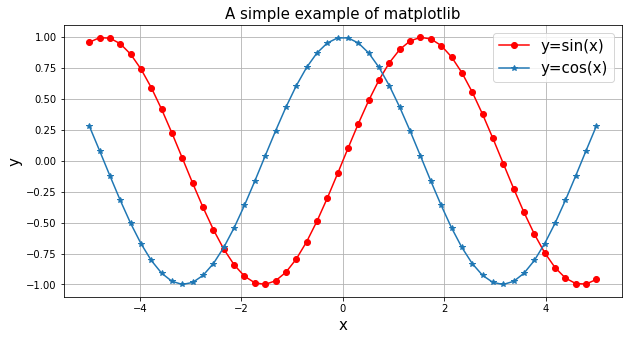

In [64]:
plt.figure(figsize=(10, 5))

x = np.linspace(start=-5, stop=5, num=50)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin, label='y=sin(x)', marker='o', color='r')
plt.plot(x, y_cos, label='y=cos(x)', marker='*')
plt.grid(True)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('A simple example of matplotlib', fontsize=15)
plt.legend(fontsize=15)

plt.show()

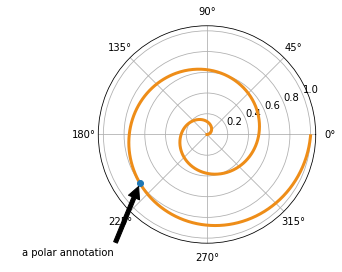

In [65]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

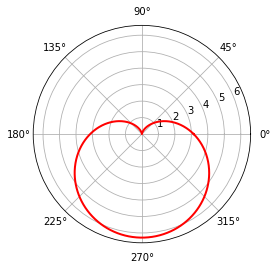

In [66]:
# -*- coding:utf8 -*-
# __author__ = 'wangxuhao'
# __file__ = 'Cardioid_polar'
 
import numpy as np
import matplotlib.pyplot as plt
 
theta = np.linspace(0, 2*np.pi, 1000)
y = np.pi * (1 - np.sin(theta))
graph = plt.subplot(111, polar=True)
graph.plot(theta, y,color='red', linewidth=2)
plt.show()

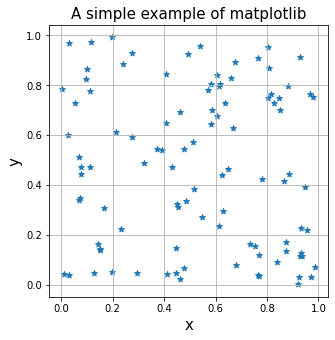

In [71]:
plt.figure(figsize=(5, 5))

points = np.random.rand(100, 2)

plt.scatter(points[:, 0], points[:, 1], marker='*')
plt.grid(True)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('A simple example of matplotlib', fontsize=15)

plt.show()

In [9]:
prob_a = [0.1, 0.2, 0.7]
prob_b = [0.5, 0.4, 0.1]
import numpy as np

def compute_kld(prob_a, prob_b):
    entropy = 0.
    for idx, item in enumerate(prob_a):
        entropy += item * np.log(item / prob_b[idx])
    
    return entropy

compute_kld(prob_a, prob_b)

1.06256387698332

In [12]:
label = [0.9999, 0.00005, 0.00005]
pred = [0.3, 0.5, 0.2]

compute_kld(label, pred)

1.2028771925450663

In [13]:
pred = [0.8, 0.1, 0.1]
compute_kld(label, pred)

0.2222611517132907

In [1]:
import numpy as np

In [15]:
x = [1, 3, 5, 7]
x = np.array(x)
x

array([1, 3, 5, 7])

In [16]:
type(x)

numpy.ndarray

In [17]:
x.shape

(4,)

In [20]:
x[2]

5

In [21]:
np.mean(x)

4.0

In [22]:
np.sum(x)

16

In [23]:
np.std(x)

2.23606797749979

In [24]:
np.zeros(shape=(3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
np.ones(shape=(3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [26]:
np.random.rand(3, 4)

array([[0.61941198, 0.8226678 , 0.06416641, 0.625856  ],
       [0.25688946, 0.47819959, 0.79873844, 0.50793468],
       [0.2620381 , 0.92575663, 0.32308708, 0.6520444 ]])

In [27]:
np.random.randn(3, 4)

array([[ 1.73013605,  0.09880515, -0.83655029,  1.47053676],
       [ 0.1004687 , -0.7910419 ,  2.52602157, -0.79154541],
       [ 0.21279268, -2.05660766,  0.35602161, -0.68709989]])

In [31]:
np.random.randint(low=0, high=9, size=(3, 4))

array([[2, 0, 8, 7],
       [8, 4, 5, 7],
       [3, 2, 3, 2]])

In [32]:
def bubble_sorting(unsrt_list):
    length = len(unsrt_list)
    for i in range(length):
        for j in range(length - i - 1):
            if (unsrt_list[j] > unsrt_list[j + 1]):
                temp = unsrt_list[j]
                unsrt_list[j] = unsrt_list[j + 1]
                unsrt_list[j + 1] = temp
    
    return unsrt_list


In [40]:
y = np.random.randint(0, 100, 10000)
import time

t_start = time.perf_counter()
bubble_sorting(y.tolist())
t_end = time.perf_counter()
print(t_end - t_start)

t_start = time.perf_counter()
np.sort(y)
t_end = time.perf_counter()
print(t_end - t_start)

7.899314300000697
0.0005156000006536487


In [41]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
np.arange(1, 5)

array([1, 2, 3, 4])

In [43]:
array_3d = np.random.rand(3, 3, 3)
array_3d

array([[[0.57680346, 0.24078507, 0.41091362],
        [0.75043884, 0.42624413, 0.80250924],
        [0.84734774, 0.58589097, 0.07096821]],

       [[0.90383455, 0.18296699, 0.29346485],
        [0.30801689, 0.1969599 , 0.58810516],
        [0.93078548, 0.58070441, 0.23634414]],

       [[0.96964703, 0.55751269, 0.53417679],
        [0.41091227, 0.0089187 , 0.8022791 ],
        [0.06966688, 0.49151938, 0.76371966]]])

In [44]:
array_3d[0, 0, 0]

0.5768034629465487

In [48]:
array_3d[:, :, 0]

array([[0.57680346, 0.75043884, 0.84734774],
       [0.90383455, 0.30801689, 0.93078548],
       [0.96964703, 0.41091227, 0.06966688]])

In [49]:
np.mean(array_3d, axis=0)

array([[0.81676168, 0.32708825, 0.41285175],
       [0.48978933, 0.21070758, 0.7309645 ],
       [0.61593336, 0.55270492, 0.35701067]])

In [50]:
array_2d = np.random.rand(2, 4)
array_2d

array([[0.38921273, 0.32766189, 0.31715306, 0.1156569 ],
       [0.12073081, 0.79185623, 0.1581178 , 0.5676447 ]])

In [57]:
np.mean(array_2d, axis=0)

array([0.25497177, 0.55975906, 0.23763543, 0.3416508 ])

In [58]:
np.ones(4) + 0.5

array([1.5, 1.5, 1.5, 1.5])

In [62]:
np.linspace(start=0, stop=1., num=20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [1]:
from numba import jit
import numpy as np
import time

In [2]:
@jit(nopython=True)
def test(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            for k in range(x.shape[2]):
                x[i, j, k] += np.log(x[i, j, k])
    
    return x

In [3]:
array_3d = np.random.rand(1000, 1000, 1000)
t_start = time.perf_counter()
test(array_3d)
t_end= time.perf_counter()
print(t_end - t_start)

7.480320500000001


# 5. Pandas

In [51]:
import pandas as pd

In [52]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [54]:
test_dict = {
    'name':'tom',
    'age':27
}
test_dict = pd.Series(test_dict)
test_dict

name    tom
age      27
dtype: object

In [55]:
test_dict = {
    'name':['tom', 'rain'],
    'age':[27, 22]
}
test_df = pd.DataFrame(test_dict)
test_df

,name,age
0,tom,27
1,rain,22


In [59]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
print(boston_dataset.data.shape)
print(boston_dataset.target)
boston_dataset

(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 5

D:\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [63]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [65]:
boston_df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [72]:
boston_df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

# 6. Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

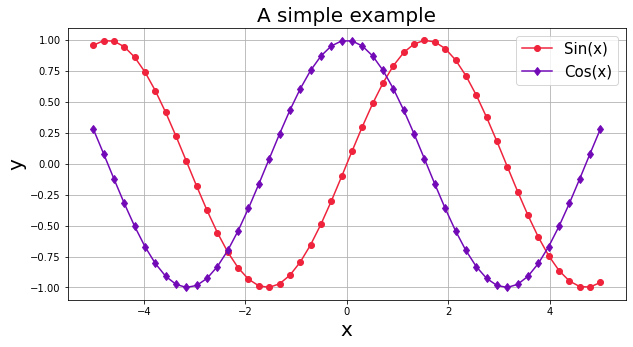

In [23]:
x = np.linspace(start=-5, stop=5, num=50)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y_sin, label='Sin(x)', marker='o', color='#ef233c')
plt.plot(x, y_cos, label='Cos(x)', marker='d', color='#7209b7')

plt.grid(True)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('A simple example', fontsize=20)
plt.legend(fontsize=15)

plt.savefig('example.pdf')
plt.show()

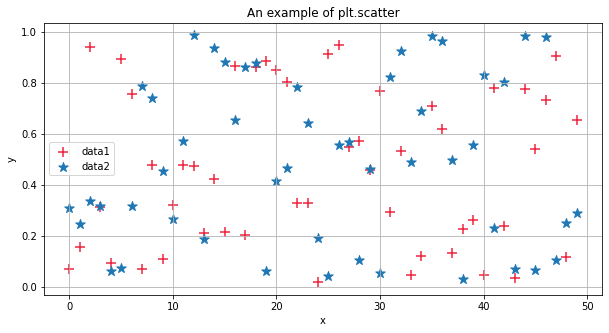

In [39]:
dataset1 = np.random.rand(50)
dataset2 = np.random.rand(50)

plt.figure(figsize=(10, 5))
plt.scatter(np.arange(50), dataset1, s=100, label='data1', marker='+',color='#ef233c')
plt.scatter(np.arange(50), dataset2, s=100, label='data2', marker='*')
plt.title('An example of plt.scatter')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

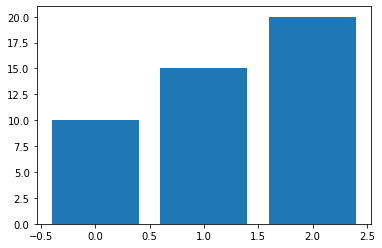

In [41]:
x = np.arange(3)
y = [10, 15, 20]
plt.bar(x, y)
plt.show()

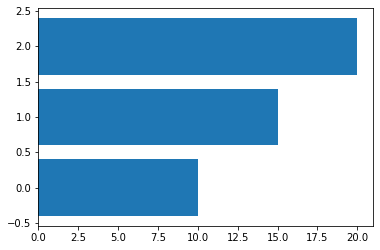

In [43]:
plt.barh(x, y)
plt.show()

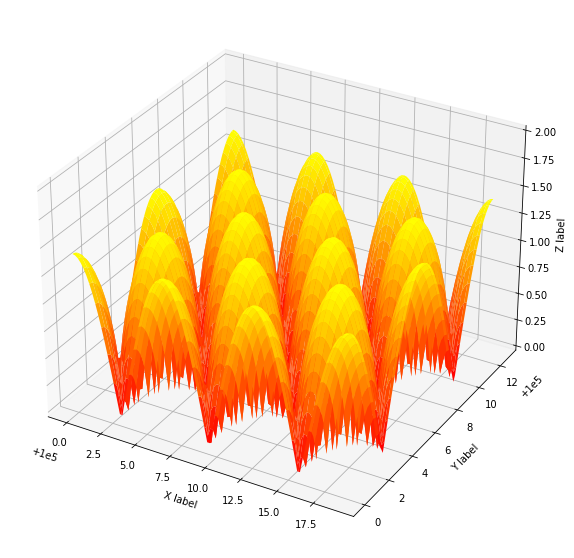

In [50]:
ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

x = np.linspace(0, 6*np.pi, 100)
y = np.linspace(0, 4*np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(np.abs(np.cos(X) + np.cos(Y)))

ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)

ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")
ax.set_zlim(0, 2)

plt.show()